In [49]:
import pandas as pd

hit_file = "../ml/processed_events_small/normalized_features_z_3.parquet"
# hit_file = "../ml/processed_events_small/normalized_features_all_particles.parquet"
train_data = pd.read_parquet(hit_file)

In [50]:
# ordered numbers of unique planes

arr = train_data['plane'].unique()

arr.sort()
arr

array([ 0.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21., 22., 23.])

In [51]:
train_data['Z_transformed'].max

<bound method Series.max of 0         0.080174
1        -0.120803
2        -1.527876
3         1.285779
4        -1.929800
            ...   
900874    0.883097
900875   -1.126801
900876    0.078852
900877   -0.723425
900878    1.083039
Name: Z_transformed, Length: 900879, dtype: float64>

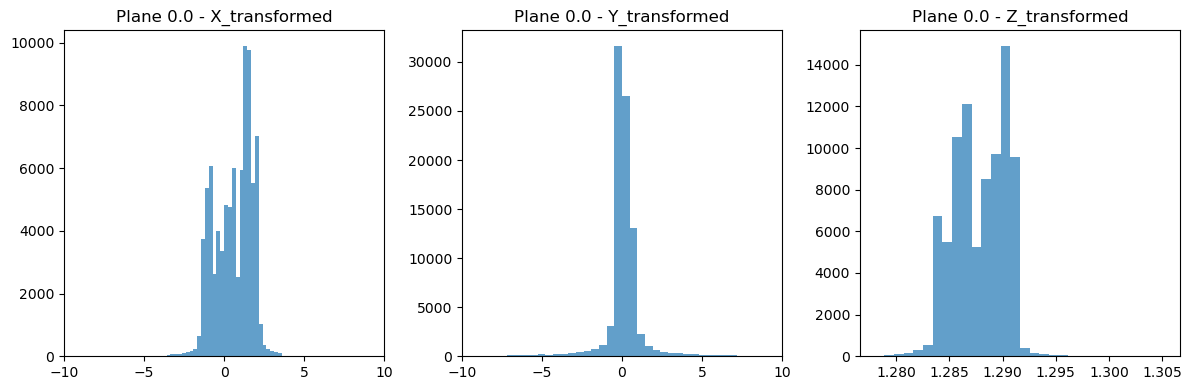

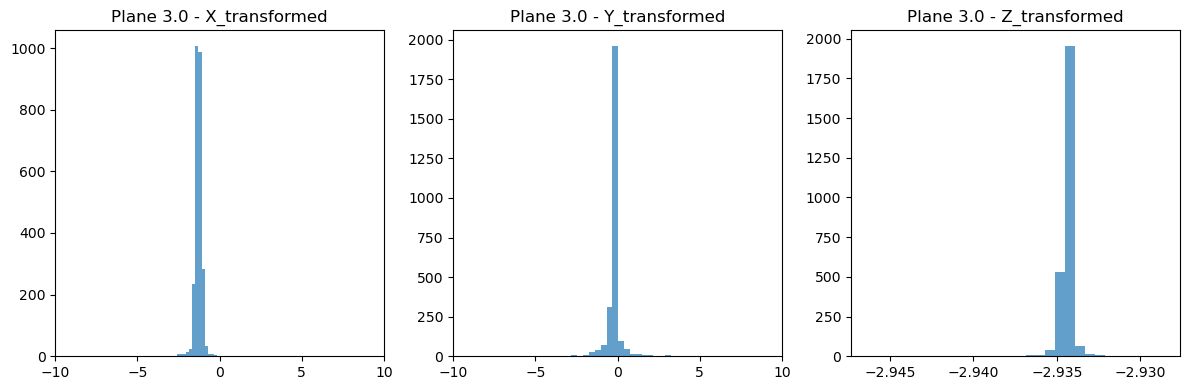

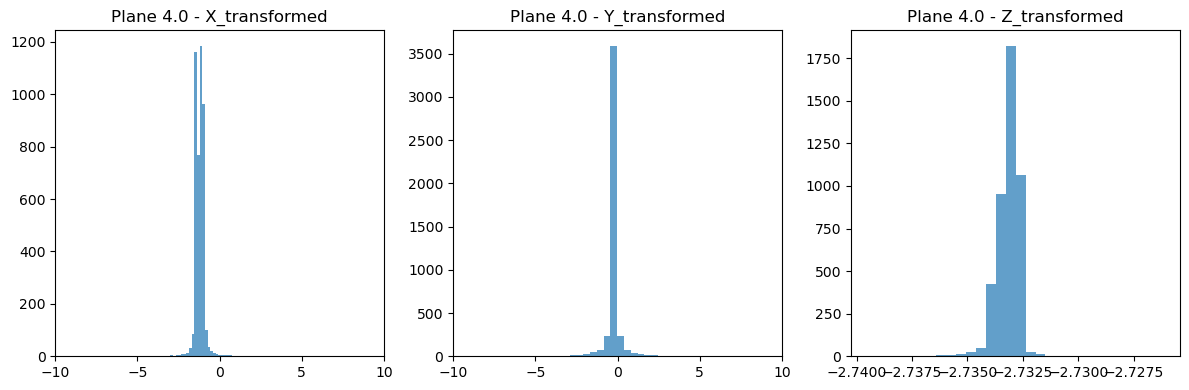

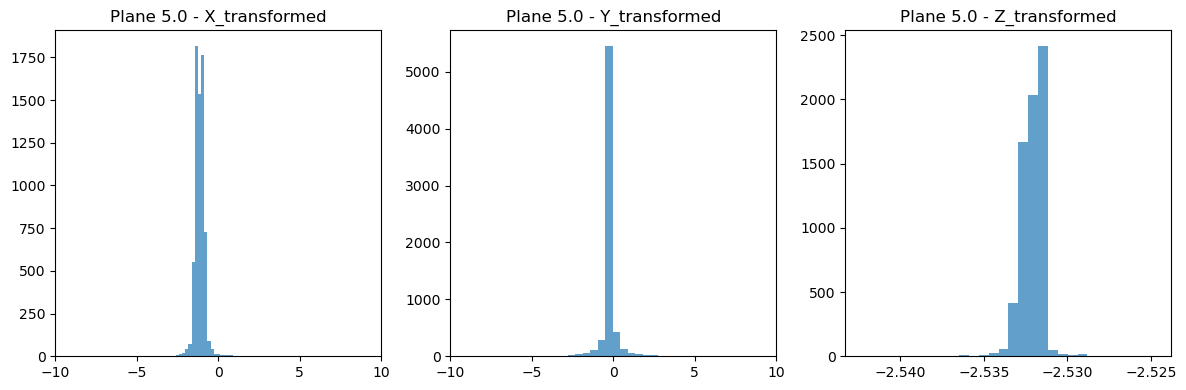

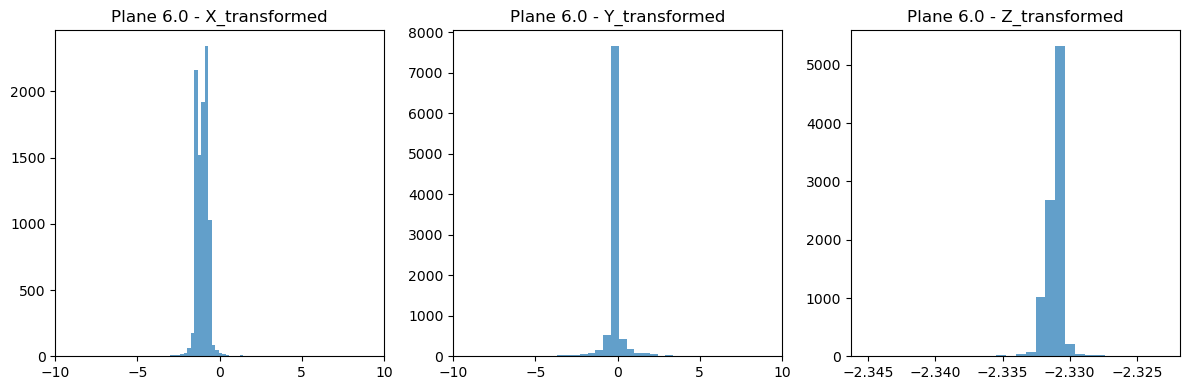

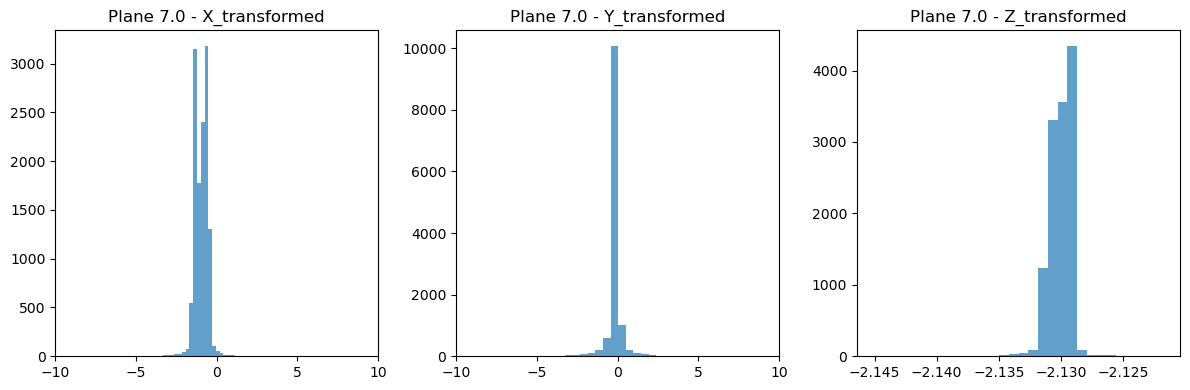

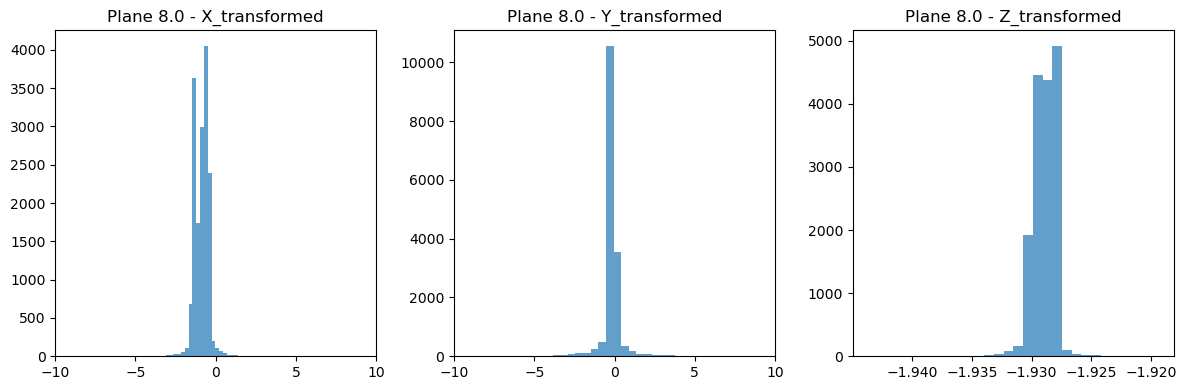

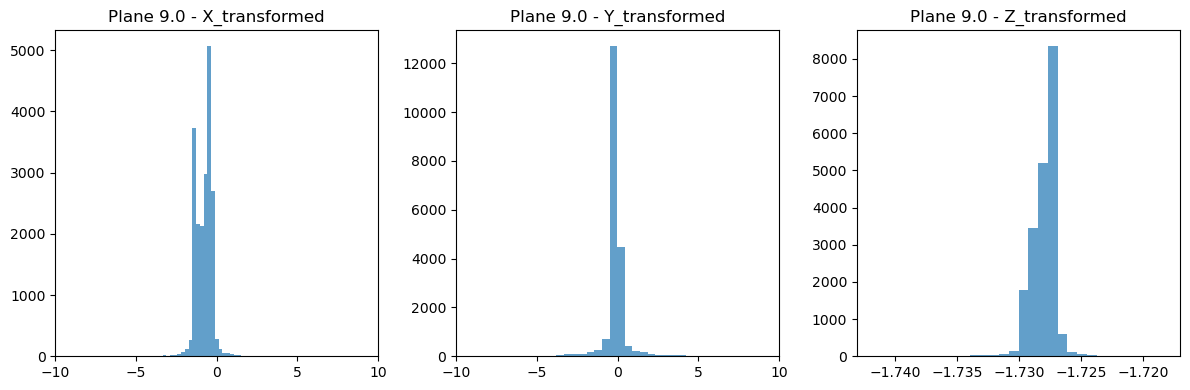

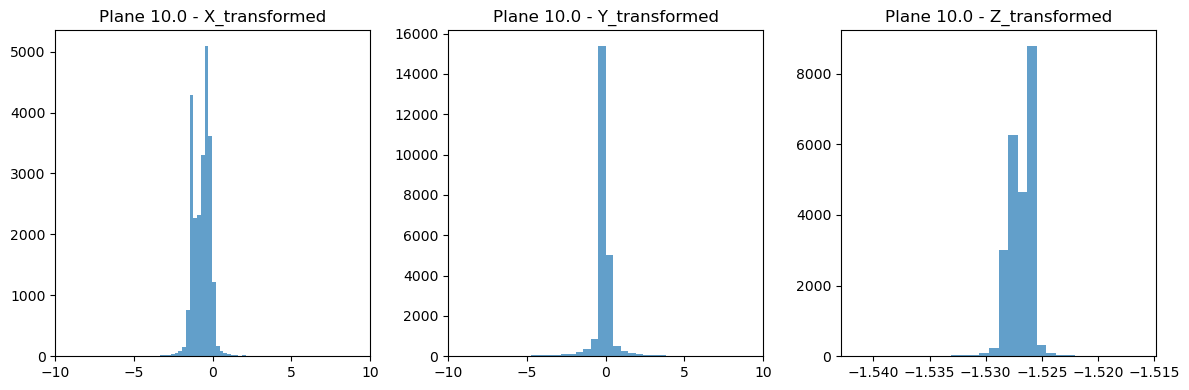

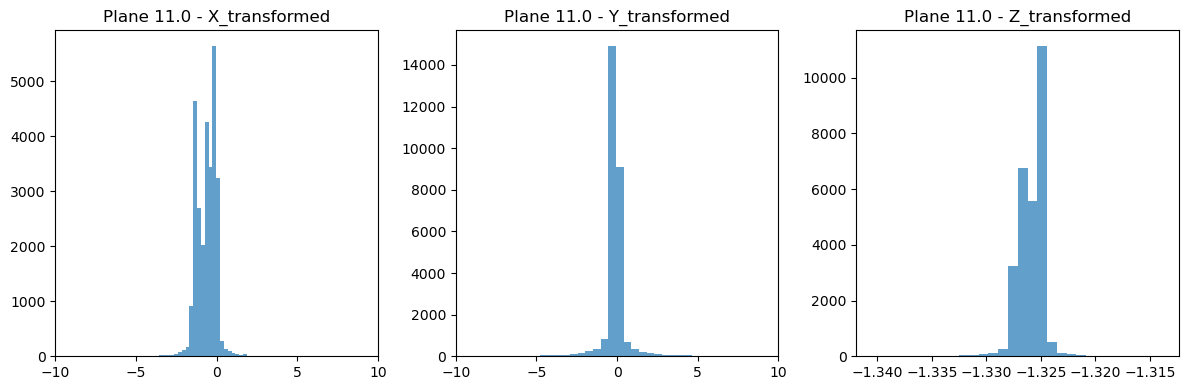

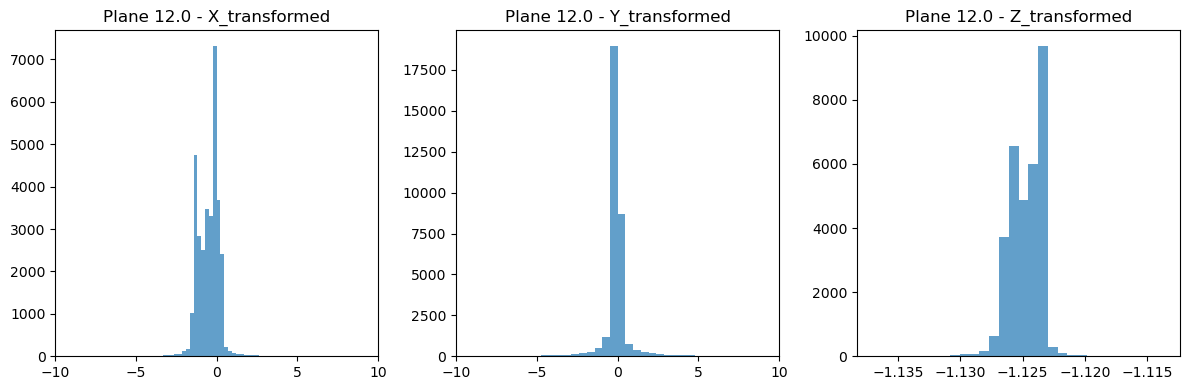

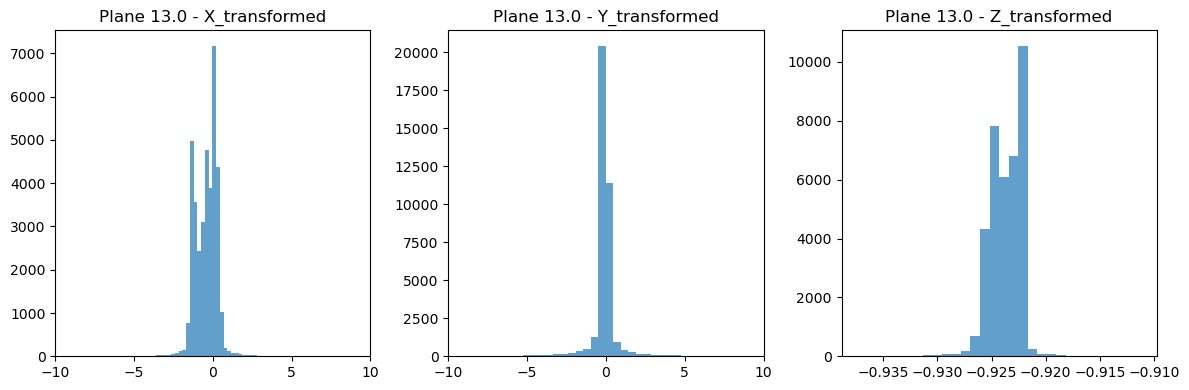

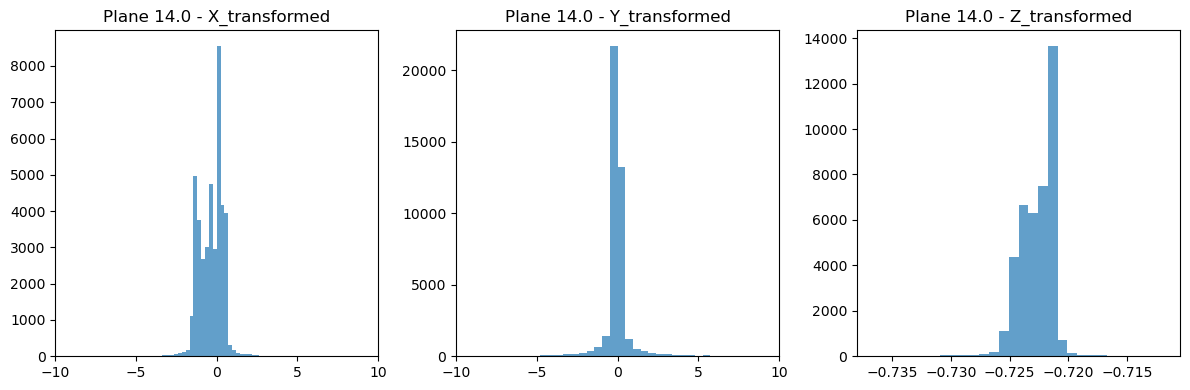

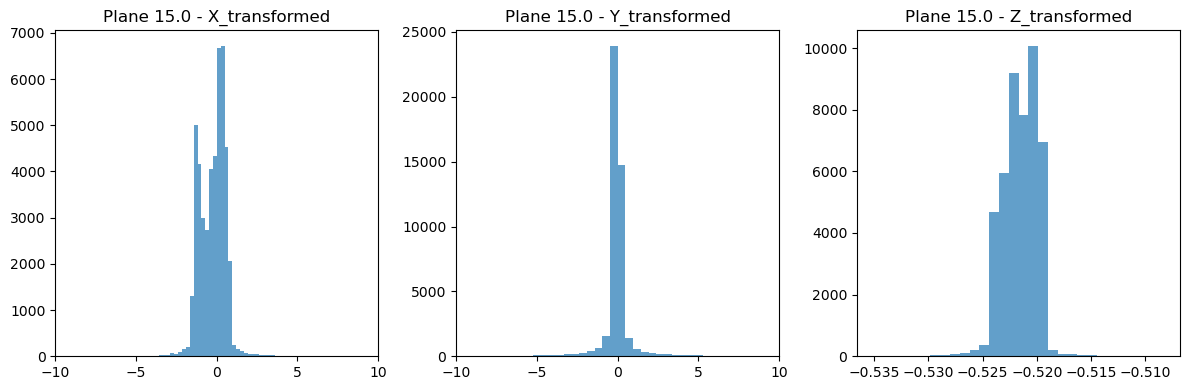

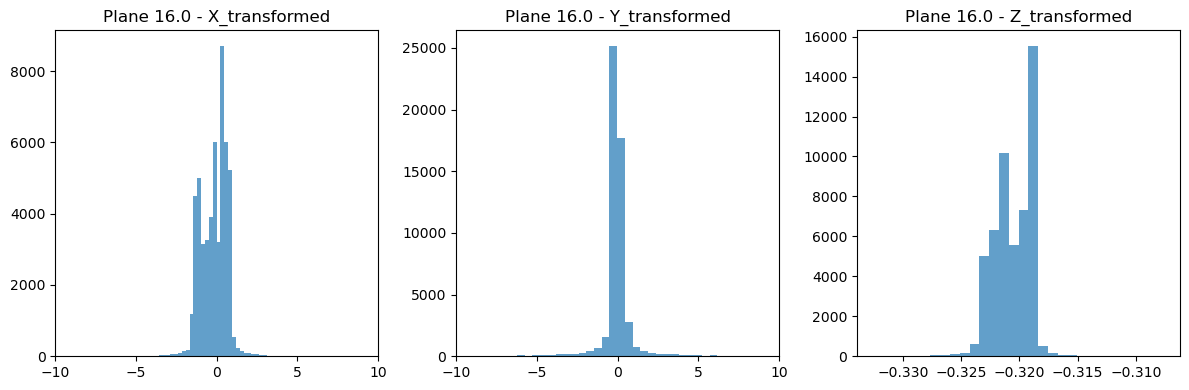

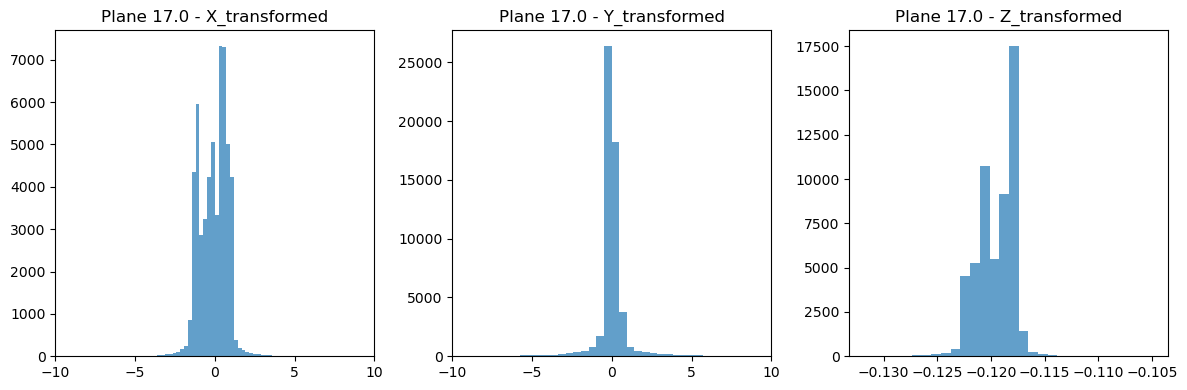

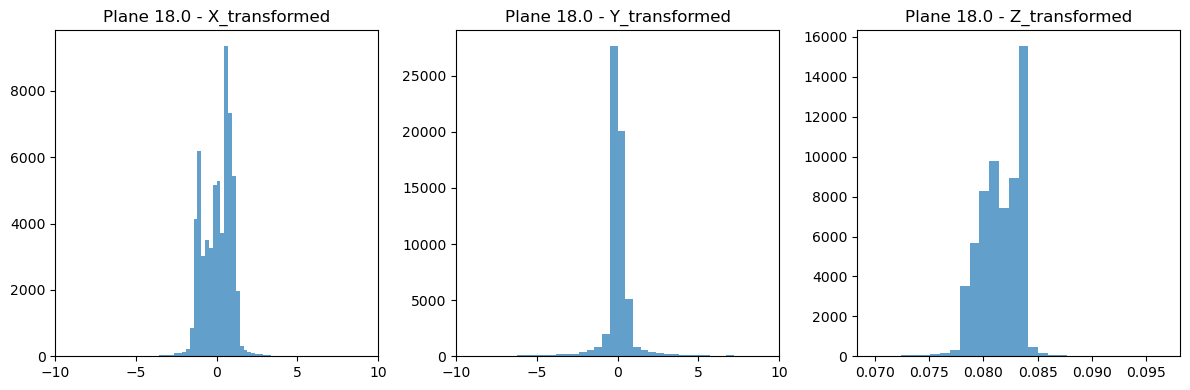

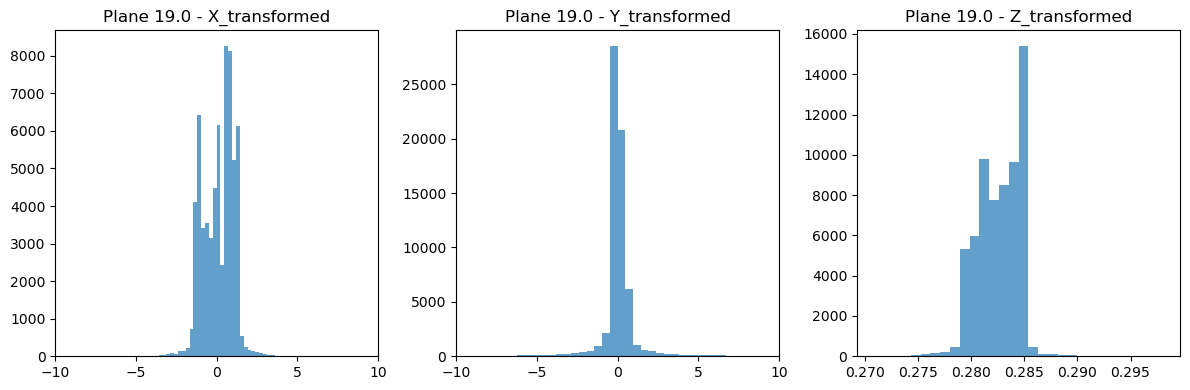

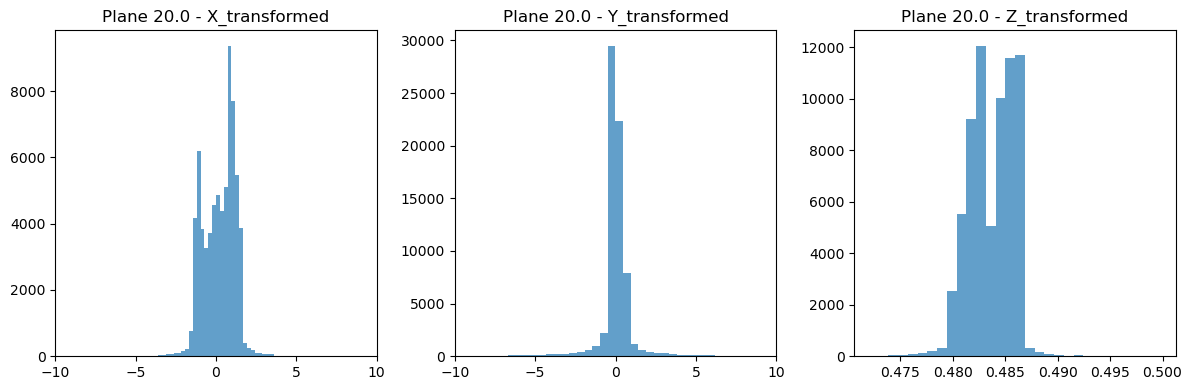

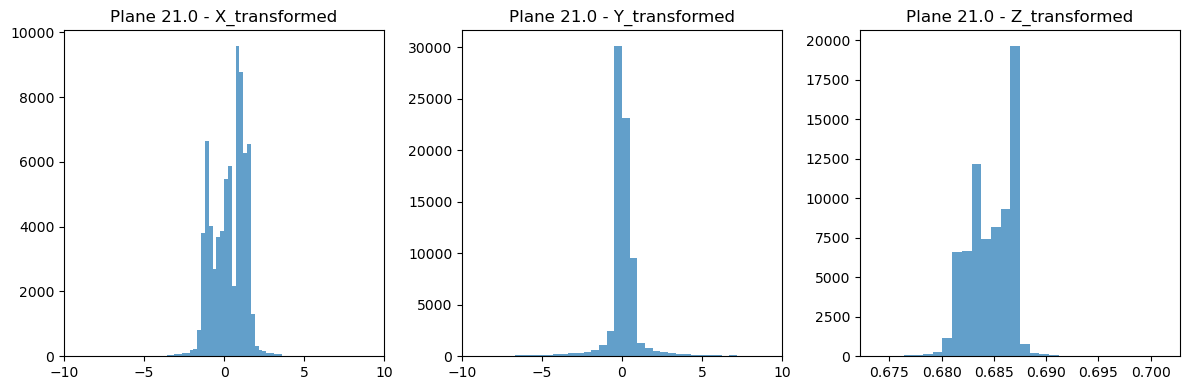

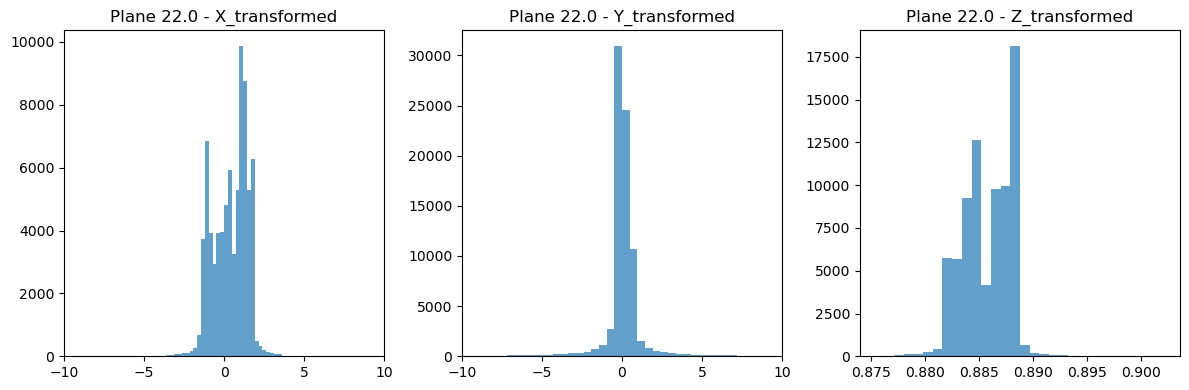

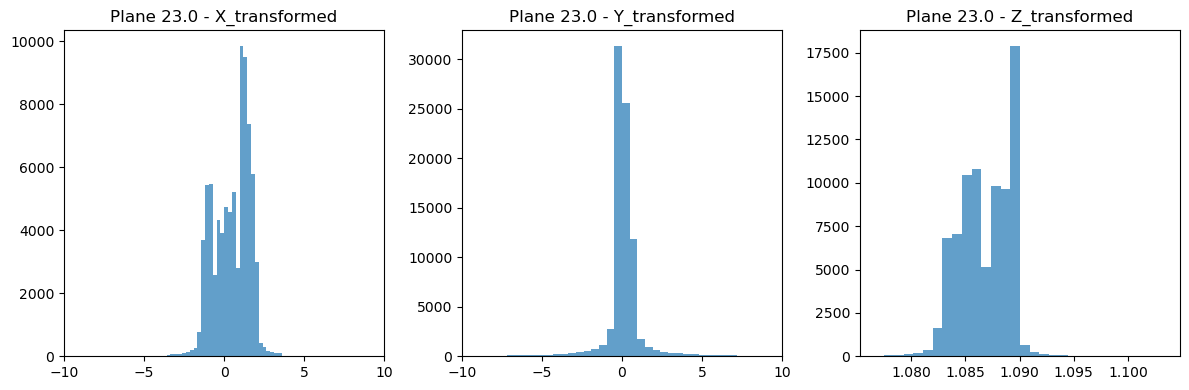

In [52]:
# group data for each plane
# measure variation for each of the x, y z coordinates for each plane
# average std deviation and mean
# plot histogram of each dimension for each plane

import matplotlib.pyplot as plt
df = train_data.copy()
arr = df['plane'].unique()
arr.sort()

for plane in arr:
    df_plane = df[df['plane'] == plane]
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.hist(df_plane['X_transformed'], bins=30, alpha=0.7, label='X_transformed')
    plt.title(f'Plane {plane} - X_transformed')
    plt.xlim(-10, 10)
    plt.subplot(1, 3, 2)
    plt.hist(df_plane['Y_transformed'], bins=30, alpha=0.7, label='Y_transformed')
    plt.title(f'Plane {plane} - Y_transformed')
    plt.xlim(-10, 10)
    plt.subplot(1, 3, 3)
    plt.hist(df_plane['Z_transformed'], bins=30, alpha=0.7, label='Z_transformed')
    plt.title(f'Plane {plane} - Z_transformed')
    # plt.xlim(-10, 10)
    plt.tight_layout()
    plt.show()
    
# df_grouped = df.groupby('plane').agg({
#     'X_transformed': ['mean', 'min', 'max'],
#     'Y_transformed': ['mean', 'min', 'max'],
#     'Z_transformed': ['mean', 'min', 'max']
# }).reset_index()

# df_grouped

In [53]:
import sklearn as sk
from sklearn.model_selection import train_test_split

input_columns = [
            "primary_kinetic_energy",
            "sin_azimuth", "cos_azimuth", "sin_zenith", "cos_zenith"
        ]
output_columns = [
            "kinetic_energy", 
            "distance",
            "X_transformed", "Y_transformed", "Z_transformed",
        ]
batch_identifier = "event_id"

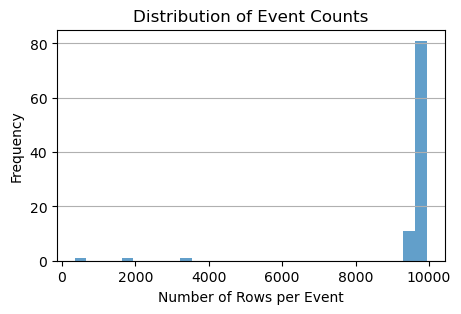

In [54]:
import matplotlib.pyplot as plt

# count number of rows per event and plot distribution
event_counts = train_data[batch_identifier].value_counts().sort_index()
plt.figure(figsize=(5, 3))
plt.hist(event_counts, bins=30, alpha=0.7)
plt.title("Distribution of Event Counts")
plt.xlabel("Number of Rows per Event")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

In [55]:
# print average variation in input columns for each event
for col in input_columns:
    event_variation = train_data.groupby(batch_identifier)[col].std()
    print(f"Average variation in {col} per event:\n", event_variation.mean())

Average variation in primary_kinetic_energy per event:
 0.0
Average variation in sin_azimuth per event:
 0.0
Average variation in cos_azimuth per event:
 0.0
Average variation in sin_zenith per event:
 0.0
Average variation in cos_zenith per event:
 0.0


This proves there is a single primary particle for each event

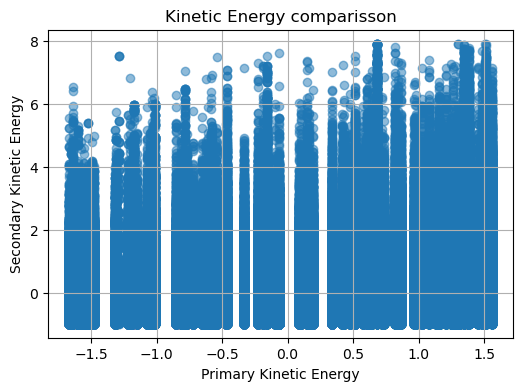

In [56]:
# plot primary kinetic energy vs kinetic energy for each event
plt.figure(figsize=(6, 4))
plt.scatter(train_data['primary_kinetic_energy'], train_data['kinetic_energy'], alpha=0.5)
plt.title("Kinetic Energy comparisson")
plt.xlabel("Primary Kinetic Energy")
plt.ylabel("Secondary Kinetic Energy")
plt.grid()
plt.show()

# select event with most data

In [57]:
# list number of samples per event
event_samples = train_data[batch_identifier].value_counts()
print("Number of samples per event:\n", event_samples)

# select event with top smaples and plot distribution of X, Y, Z transformed
top_event_id = event_samples.idxmax()
top_event_data = train_data[train_data[batch_identifier] == top_event_id]

print(f"Top event ID: {top_event_id} with {event_samples.max()} samples")

Number of samples per event:
 event_id
33619977.0    9944
33620634.0    9929
33620640.0    9929
33619872.0    9905
33620699.0    9888
              ... 
33620555.0    9421
33620672.0    9382
33620560.0    3288
33620826.0    1713
33620804.0     348
Name: count, Length: 95, dtype: int64
Top event ID: 33619977.0 with 9944 samples


In [58]:
# select top 10 events 
top_event_ids = event_samples.nlargest(10).index
top_event_ids

Index([33619977.0, 33620634.0, 33620640.0, 33619872.0, 33620699.0, 33620586.0,
       33620631.0, 33620023.0, 33620124.0, 33620605.0],
      dtype='float64', name='event_id')

In [59]:
top_event_data

,kinetic_energy,primary_kinetic_energy,X_transformed,Y_transformed,Z_transformed,distance,time_transformed,sin_azimuth,cos_azimuth,sin_zenith,cos_zenith,event_id,pdg,plane
68112,-0.388378,-0.584722,-0.964194,-0.176260,-0.520041,-0.521564,0.503384,0.057147,0.998366,0.012908,0.999917,33619977.0,22.0,15.0
68113,-0.814407,-0.584722,-0.907566,-0.448937,0.284706,0.282648,0.545209,0.057147,0.998366,0.012908,0.999917,33619977.0,22.0,19.0
68114,-0.186003,-0.584722,-0.905896,-0.143873,0.284704,0.282648,0.663067,0.057147,0.998366,0.012908,0.999917,33619977.0,22.0,19.0
68115,0.369995,-0.584722,-0.588945,-0.110390,1.089209,1.086860,0.620789,0.057147,0.998366,0.012908,0.999917,33619977.0,22.0,23.0
68116,-0.572524,-0.584722,-0.855654,-0.197444,0.083458,0.081595,0.597811,0.057147,0.998366,0.012908,0.999917,33619977.0,22.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78051,-0.251927,-0.584722,-1.142150,-0.219818,-1.525874,-1.526829,0.371143,0.057147,0.998366,0.012908,0.999917,33619977.0,22.0,10.0
78052,0.837936,-0.584722,-1.137709,-0.225166,-1.525878,-1.526829,0.346457,0.057147,0.998366,0.012908,0.999917,33619977.0,22.0,10.0
78053,-0.715941,-0.584722,-1.359685,-0.257703,-2.732871,-2.733147,0.127491,0.057147,0.998366,0.012908,0.999917,33619977.0,22.0,4.0
78054,-0.845954,-0.584722,-0.854128,-0.046003,0.485856,0.483701,0.630136,0.057147,0.998366,0.012908,0.999917,33619977.0,11.0,20.0


# 3D plot

In [60]:
top_event_data = train_data[train_data[batch_identifier] == top_event_ids[0]]

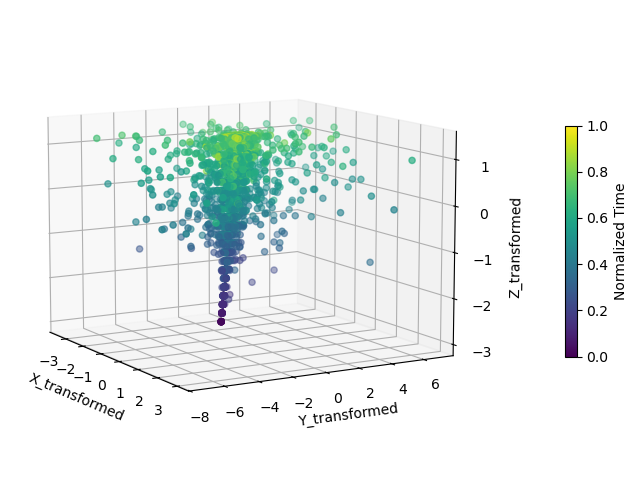

In [61]:
# plot 3d particle plot where x, y, z are X_transformed, Y_transformed, Z_transformed and color depends on kinetic energy
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import time


fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

tmin = top_event_data['time_transformed'].min()
tmax = top_event_data['time_transformed'].max()
cmap = plt.get_cmap('viridis')

# Scatter plot
sc = ax.scatter(
        top_event_data['X_transformed'], 
        top_event_data['Y_transformed'], 
        top_event_data['Z_transformed'],
        color=cmap((top_event_data["time_transformed"] - tmin) / (tmax - tmin)),
    )

cbar = plt.colorbar(sc, label='Normalized Time', pad = 0.1, shrink=0.5)
ax.set_xlabel('X_transformed')
ax.set_ylabel('Y_transformed')
ax.set_zlabel('Z_transformed')
ax.view_init(elev=10., azim=330.0)



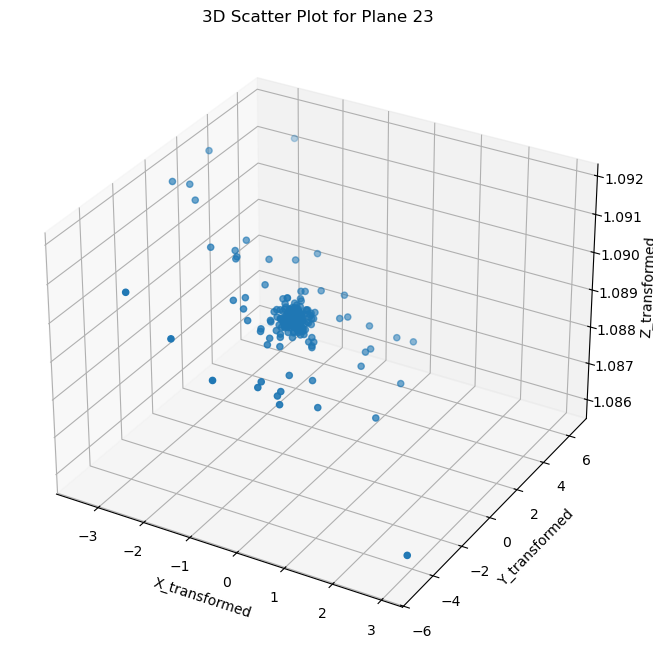

In [62]:
# plot only 3d data for plane 23
plane_23_data = top_event_data[top_event_data['plane'] == 23]
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(plane_23_data['X_transformed'], plane_23_data['Y_transformed'], plane_23_data['Z_transformed'])
ax.set_title('3D Scatter Plot for Plane 23')
ax.set_xlabel('X_transformed')
ax.set_ylabel('Y_transformed')
ax.set_zlabel('Z_transformed')
plt.show()

# Project data on last plane

In [63]:
# compute normal to the plane using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(plane_23_data[['X_transformed', 'Y_transformed', 'Z_transformed']])
normal_vector = pca.components_[2]

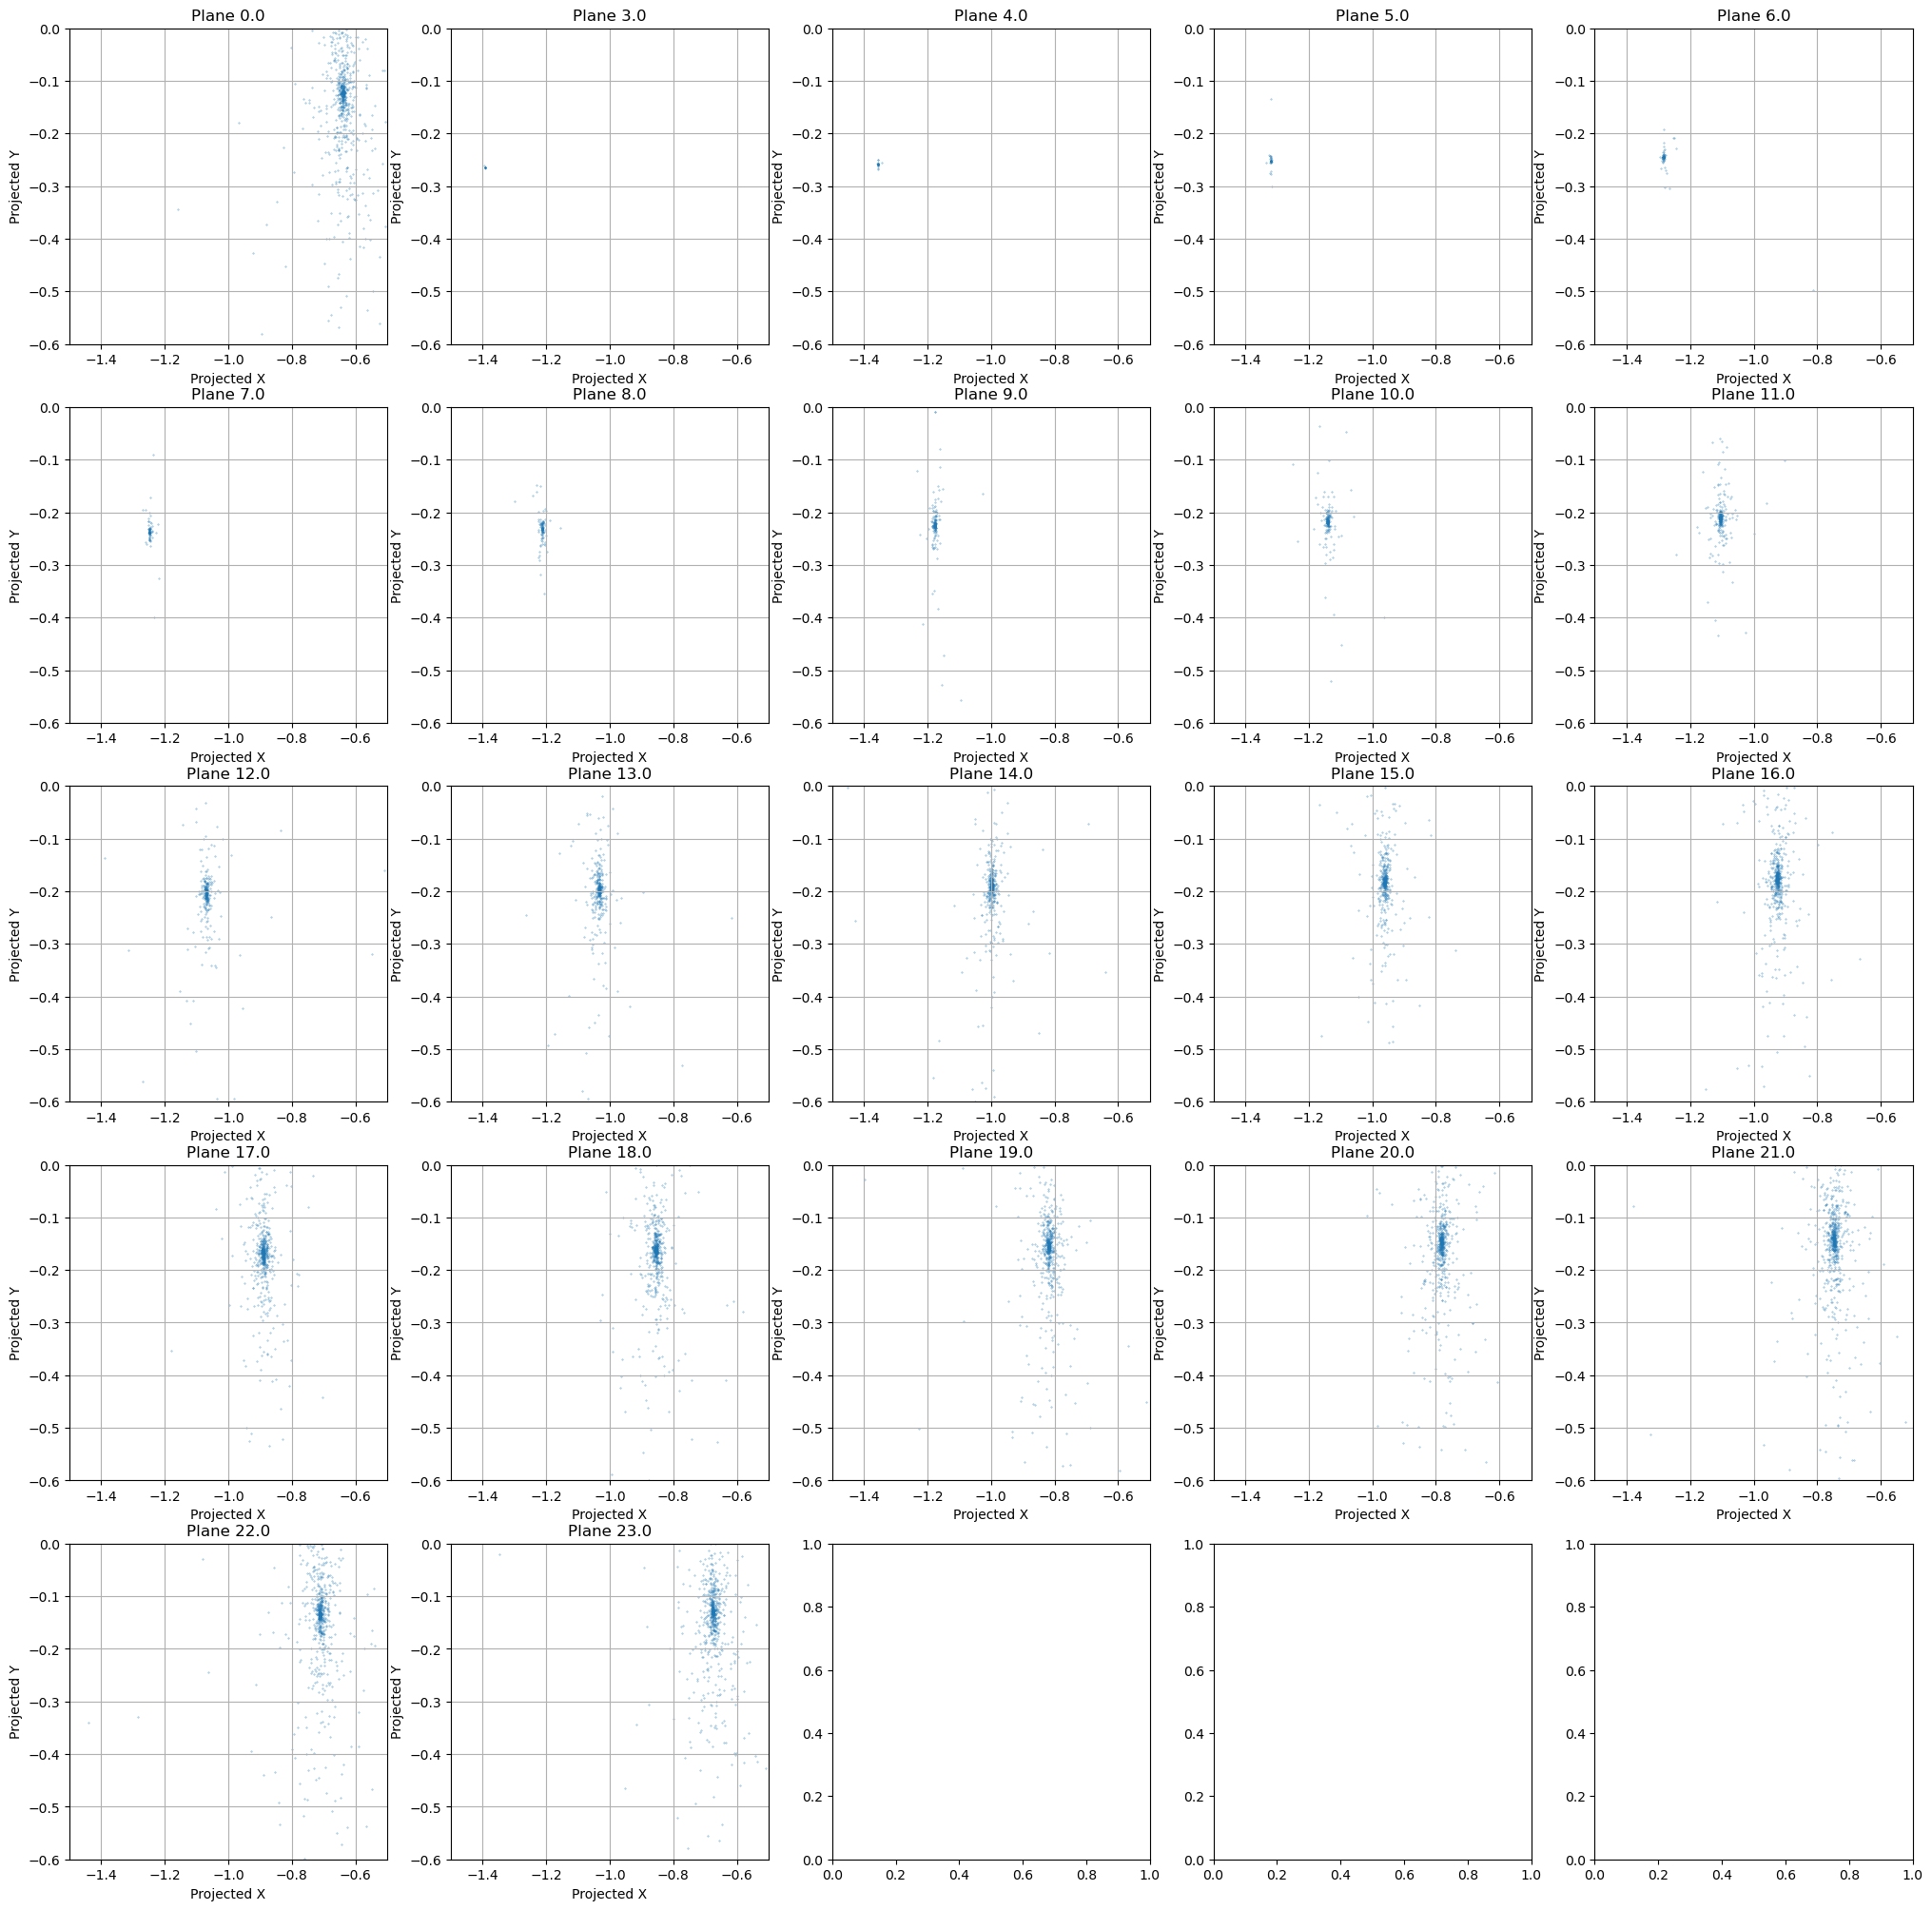

In [64]:

# print each plane now
# use subplots to plot all planes in a single figure
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(25, 25))

for i, plane in enumerate(arr):
    plane_data = top_event_data[top_event_data['plane'] == plane]
    projected_points = plane_data[['X_transformed', 'Y_transformed', 'Z_transformed']].values - plane_data[['X_transformed', 'Y_transformed', 'Z_transformed']].values.dot(normal_vector)[:, np.newaxis] * normal_vector
    ax = axs[i // 5, i % 5]
    ax.scatter(projected_points[:, 0], projected_points[:, 1], alpha=0.7, s=0.1)
    ax.set_title(f'Plane {plane}')
    ax.set_xlabel('Projected X')
    ax.set_ylabel('Projected Y')
    
    # compute mean and std deviation for projected points
    mean = np.mean(projected_points, axis=0)
    std = np.std(projected_points, axis=0)
    
    ax.set_xlim(-1.5, -0.5)
    ax.set_ylim(-0.6, 0)
    ax.grid()

In [65]:
projected_points[:, 1].mean()

-0.1499079676836543

In [66]:
mean = projected_points.mean(axis=0)
std = projected_points.std(axis=0)
print("Mean of projected points:", mean)
print("Standard deviation of projected points:", std)

Mean of projected points: [-6.83347227e-01 -1.49907968e-01  6.34939783e-04]
Standard deviation of projected points: [3.19487063e-01 6.43227237e-01 2.96855008e-04]


/tmp/ipykernel_11274/2817673429.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


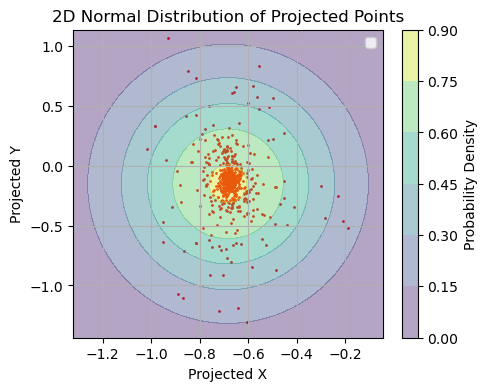

In [67]:
# plot 2d normal distribution in x and y with mean and std

x = np.linspace(mean[0] - 3*std[0], mean[0] + 3*std[0], 100)
y = np.linspace(mean[1] - 6*std[1], mean[1] + 6*std[1], 100)
X, Y = np.meshgrid(x, y)
Z = (1 / (std[0] * std[1] * 2 * np.pi)) * np.exp(-0.5 * (((X - mean[0]) / std[0])**2 + ((Y - mean[1]) / std[1])**2))

plt.figure(figsize=(5, 4))
# transparent contour plot

plt.scatter(projected_points[:, 0], projected_points[:, 1], c='red', s=1)
plt.contourf(X, Y, Z, levels=5, cmap='viridis', alpha=0.4)
plt.colorbar(label='Probability Density')
plt.title('2D Normal Distribution of Projected Points')
plt.xlabel('Projected X')
plt.ylabel('Projected Y')
plt.xlim(mean[0] - 2*std[0], mean[0] + 2*std[0])
plt.ylim(mean[1] - 2*std[1], mean[1] + 2*std[1])
plt.legend()
plt.grid()
plt.show()


# Energy per plane

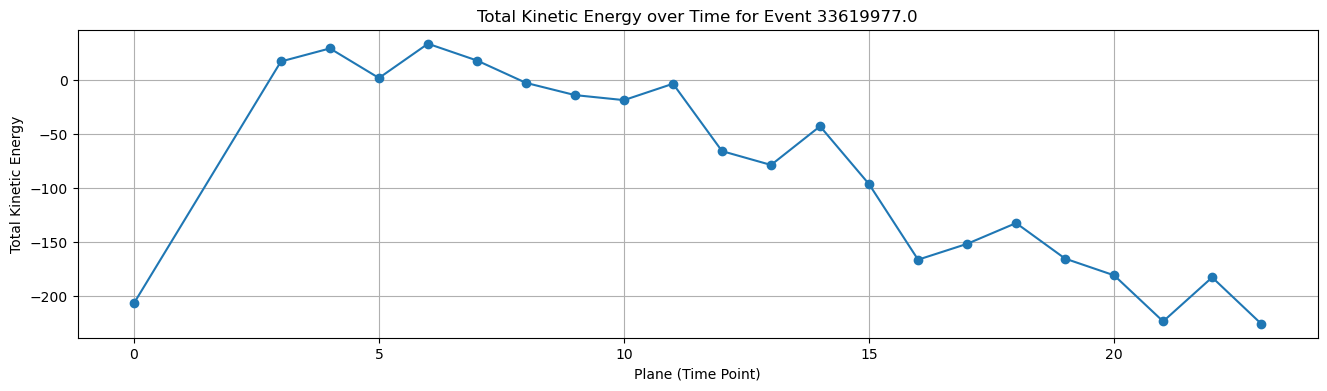

In [68]:
# plot total kinetic energy for each time point in the event
time_points = np.sort(top_event_data['plane'].unique())
total_kinetic_energy = []
for t in time_points:
    total_ke = top_event_data[top_event_data['plane'] == t]['kinetic_energy'].sum()
    total_kinetic_energy.append(total_ke)
plt.figure(figsize=(16, 4))
plt.plot(time_points, total_kinetic_energy, marker='o')
plt.title(f'Total Kinetic Energy over Time for Event {top_event_id}')
plt.xlabel('Plane (Time Point)')
plt.ylabel('Total Kinetic Energy')
plt.grid()
plt.show()

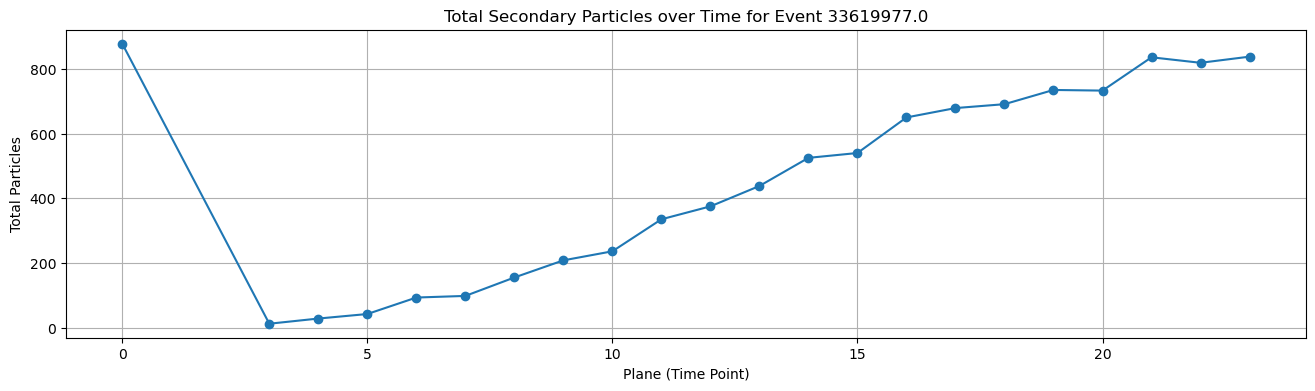

In [69]:
# plot number of secondary particles for each plane in the event
time_points = np.sort(top_event_data['plane'].unique())
total_secondaries = []
for t in time_points:
    # count rows
    total_particles = top_event_data[top_event_data['plane'] == t].shape[0]
    total_secondaries.append(total_particles)
plt.figure(figsize=(16, 4))
plt.plot(time_points, total_secondaries, marker='o')
plt.title(f'Total Secondary Particles over Time for Event {top_event_id}')
plt.xlabel('Plane (Time Point)')
plt.ylabel('Total Particles')
plt.grid()
plt.show()

NameError: name 'colormaps' is not defined

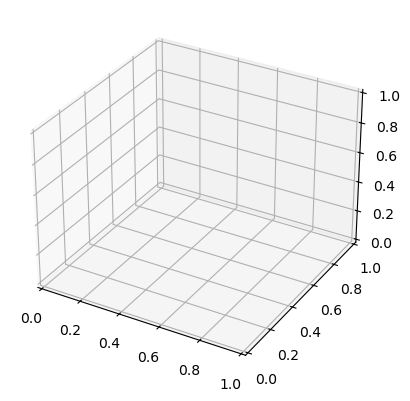

In [70]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
cmap = colormaps.get_cmap("jet")

for particledir in particledirs:
    akf = ak.from_parquet(f"{particledir}/particles.parquet")
    
    with open(f"{particledir}/config.yaml") as f:
        config = yaml.safe_load(f)
    center = np.array(config["plane"]["center"])
    zhat = np.array(config["plane"]["normal"])
    xhat = np.array(config["x-axis"])
    yhat = np.array(config["y-axis"])

    mat = np.array([xhat, yhat, zhat])
    
    xyzs = np.zeros((3, len(akf)))

    for idx, (x, y) in enumerate(zip(akf["x"], akf["y"])):
        xyz = np.array([x, y, 0.0])
        xyzs[:, idx] = np.matmul(mat, xyz) + center
    
    ax.scatter(
        xyzs[0, :],
        xyzs[1, :],
        xyzs[2, :],
        color=cmap((akf["time"] - tmin) / (tmax - tmin)),
        alpha=0.3
    )

ax.view_init(elev=10., azim=270.0)

# plt.savefig("../figures/shower_scatter.png")
plt.show()

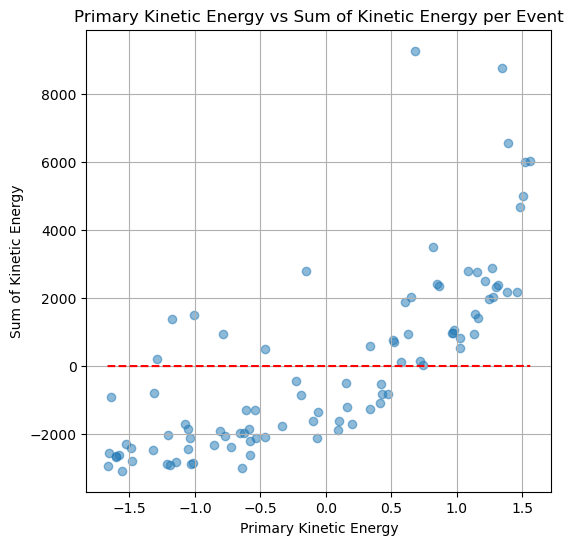

In [ ]:

# compare mean value for square of primary_kinetic_energy and sum over kinetic_energy 
# for each eventid
# plot scatter plot of primary_kinetic_energy vs sum of kinetic_energy
event_agg = train_data.groupby(batch_identifier).agg({
    'primary_kinetic_energy': 'mean',
    'kinetic_energy': 'sum'
}).reset_index()
plt.figure(figsize=(6, 6))
plt.scatter(event_agg['primary_kinetic_energy'], event_agg['kinetic_energy'], alpha=0.5)
plt.title("Primary Kinetic Energy vs Sum of Kinetic Energy per Event")
plt.xlabel("Primary Kinetic Energy")
plt.ylabel("Sum of Kinetic Energy")
plt.grid()
plt.plot([event_agg['primary_kinetic_energy'].min(), event_agg['primary_kinetic_energy'].max()],
         [event_agg['primary_kinetic_energy'].min(), event_agg['primary_kinetic_energy'].max()],
         color='red', linestyle='--')
plt.show()

In [ ]:
# for each event keep the input features and calcuate mean and std of the outptu features
# save mean and std in separate columns using _ suffixes
event_stats = train_data.groupby(batch_identifier).agg(
    {
        **{col : 'first' for col in input_columns},
        **{col: ['mean', 'std'] for col in output_columns}
    }
).reset_index()

event_stats.columns = [f"{col}_{stat}" if stat in ['mean', 'std'] else col for col, stat in event_stats.columns]

In [ ]:
# update output feature names
output_columns = [f"{col}_mean" for col in output_columns] + [f"{col}_std" for col in output_columns]

In [ ]:
event_stats.head()

,event_id,primary_kinetic_energy,sin_azimuth,cos_azimuth,sin_zenith,cos_zenith,kinetic_energy_mean,kinetic_energy_std,distance_mean,distance_std,X_transformed_mean,X_transformed_std,Y_transformed_mean,Y_transformed_std,Z_transformed_mean,Z_transformed_std
0,33619162.0,-1.490952,0.105454,0.994424,0.046285,0.998928,-0.251542,0.746769,-0.145662,0.962048,0.646231,0.751918,0.474124,1.188510,-0.147211,0.961667
1,33619823.0,-0.579293,0.085189,0.996365,0.041124,0.999154,-0.225853,0.802012,-0.134337,1.001135,0.422394,0.649640,0.256833,0.831571,-0.135153,1.000968
2,33619872.0,0.516080,0.021693,0.999765,0.001436,0.999999,0.071062,1.004456,0.172124,0.873949,-1.422239,0.233482,-0.277953,0.557183,0.174342,0.874513
3,33619891.0,-0.467041,0.062685,0.998033,0.007695,0.999970,-0.214330,0.801039,-0.161847,1.068925,-1.132140,0.358457,-0.209237,0.858238,-0.159947,1.069582
4,33619916.0,-0.611274,0.075489,0.997147,0.044536,0.999008,-0.132218,0.844476,0.183308,0.814891,0.782424,0.632485,0.284270,1.065158,0.181882,0.814624


In [ ]:
print(f"Event stats columns: {event_stats.columns}")
print(f"Input columns: {input_columns}")
print(f"Output columns: {output_columns}")

Event stats columns: Index(['event_id', 'primary_kinetic_energy', 'sin_azimuth', 'cos_azimuth',
       'sin_zenith', 'cos_zenith', 'kinetic_energy_mean', 'kinetic_energy_std',
       'distance_mean', 'distance_std', 'X_transformed_mean',
       'X_transformed_std', 'Y_transformed_mean', 'Y_transformed_std',
       'Z_transformed_mean', 'Z_transformed_std'],
      dtype='object')
Input columns: ['primary_kinetic_energy', 'sin_azimuth', 'cos_azimuth', 'sin_zenith', 'cos_zenith']
Output columns: ['kinetic_energy_mean', 'distance_mean', 'X_transformed_mean', 'Y_transformed_mean', 'Z_transformed_mean', 'kinetic_energy_std', 'distance_std', 'X_transformed_std', 'Y_transformed_std', 'Z_transformed_std']


In [ ]:
# split inputs and outputs 
X = event_stats[input_columns]
y = event_stats[output_columns]

# split into training and validation sets using sklearn
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1234)

print(f"Training set size: {X_train.shape[0]} events")
print(f"Validation set size: {X_val.shape[0]} events")

Training set size: 76 events
Validation set size: 19 events


In [ ]:
# list number of features
print(f"Number of input features: {X_train.shape[1]}")
print(f"Number of output features: {y_train.shape[1]}")

Number of input features: 5
Number of output features: 10


In [ ]:
# train a simple FFN model based on torch
import torch.nn as nn
class SimpleFFN(nn.Module):
    def __init__(self, input_size=5, output_size=10, hidden_dim=10):
        super(SimpleFFN, self).__init__()
        
        self.hit_encoder = nn.Sequential(
            nn.Linear(input_size, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
        )
        self.event_head = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_size),
        )
        
        
    def forward(self, x):
        x = self.hit_encoder(x)
        x = self.event_head(x)
        return x

In [ ]:
# train and test NN model using adam optimizer and MSE loss

import torch
import torch.optim as optim
model = SimpleFFN(input_size=X_train.shape[1], output_size=y_train.shape[1], hidden_dim=10)
# use relative error as loss function
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# start training loop
num_epochs = 30000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    inputs = torch.tensor(X_train.values, dtype=torch.float32)
    targets = torch.tensor(y_train.values, dtype=torch.float32)
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 1000 == 0:
        model.eval()
        val_inputs = torch.tensor(X_val.values, dtype=torch.float32)
        val_targets = torch.tensor(y_val.values, dtype=torch.float32)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_targets)
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

Epoch [1000/30000], Loss: 0.1210, Val Loss: 0.1154
Epoch [2000/30000], Loss: 0.0450, Val Loss: 0.0331
Epoch [3000/30000], Loss: 0.0354, Val Loss: 0.0405
Epoch [4000/30000], Loss: 0.0329, Val Loss: 0.0411
Epoch [5000/30000], Loss: 0.0323, Val Loss: 0.0407
Epoch [6000/30000], Loss: 0.0314, Val Loss: 0.0442
Epoch [7000/30000], Loss: 0.0298, Val Loss: 0.0498
Epoch [8000/30000], Loss: 0.0282, Val Loss: 0.0550
Epoch [9000/30000], Loss: 0.0261, Val Loss: 0.0564
Epoch [10000/30000], Loss: 0.0250, Val Loss: 0.0559
Epoch [11000/30000], Loss: 0.0243, Val Loss: 0.0593
Epoch [12000/30000], Loss: 0.0236, Val Loss: 0.0566
Epoch [13000/30000], Loss: 0.0232, Val Loss: 0.0562
Epoch [14000/30000], Loss: 0.0231, Val Loss: 0.0571
Epoch [15000/30000], Loss: 0.0226, Val Loss: 0.0550
Epoch [16000/30000], Loss: 0.0218, Val Loss: 0.0571
Epoch [17000/30000], Loss: 0.0219, Val Loss: 0.0560
Epoch [18000/30000], Loss: 0.0213, Val Loss: 0.0577
Epoch [19000/30000], Loss: 0.0211, Val Loss: 0.0576
Epoch [20000/30000], 

In [ ]:
# test the model on validation set
model.eval()
val_inputs = torch.tensor(X_val.values, dtype=torch.float32)
val_targets = torch.tensor(y_val.values, dtype=torch.float32)
val_outputs = model(val_inputs)
val_loss = criterion(val_outputs, val_targets)
print(f"Final Validation Loss: {val_loss.item():.4f}")

Final Validation Loss: 0.0841


In [ ]:
# mean output values in data
mean_values = event_stats[output_columns].mean()
print("Mean output values in data:")
print(mean_values)

Mean output values in data:
kinetic_energy_mean    0.015481
distance_mean          0.023902
X_transformed_mean     0.032761
Y_transformed_mean     0.002665
Z_transformed_mean     0.023852
kinetic_energy_std     0.951160
distance_std           0.915024
X_transformed_std      0.544898
Y_transformed_std      0.951103
Z_transformed_std      0.915102
dtype: float64


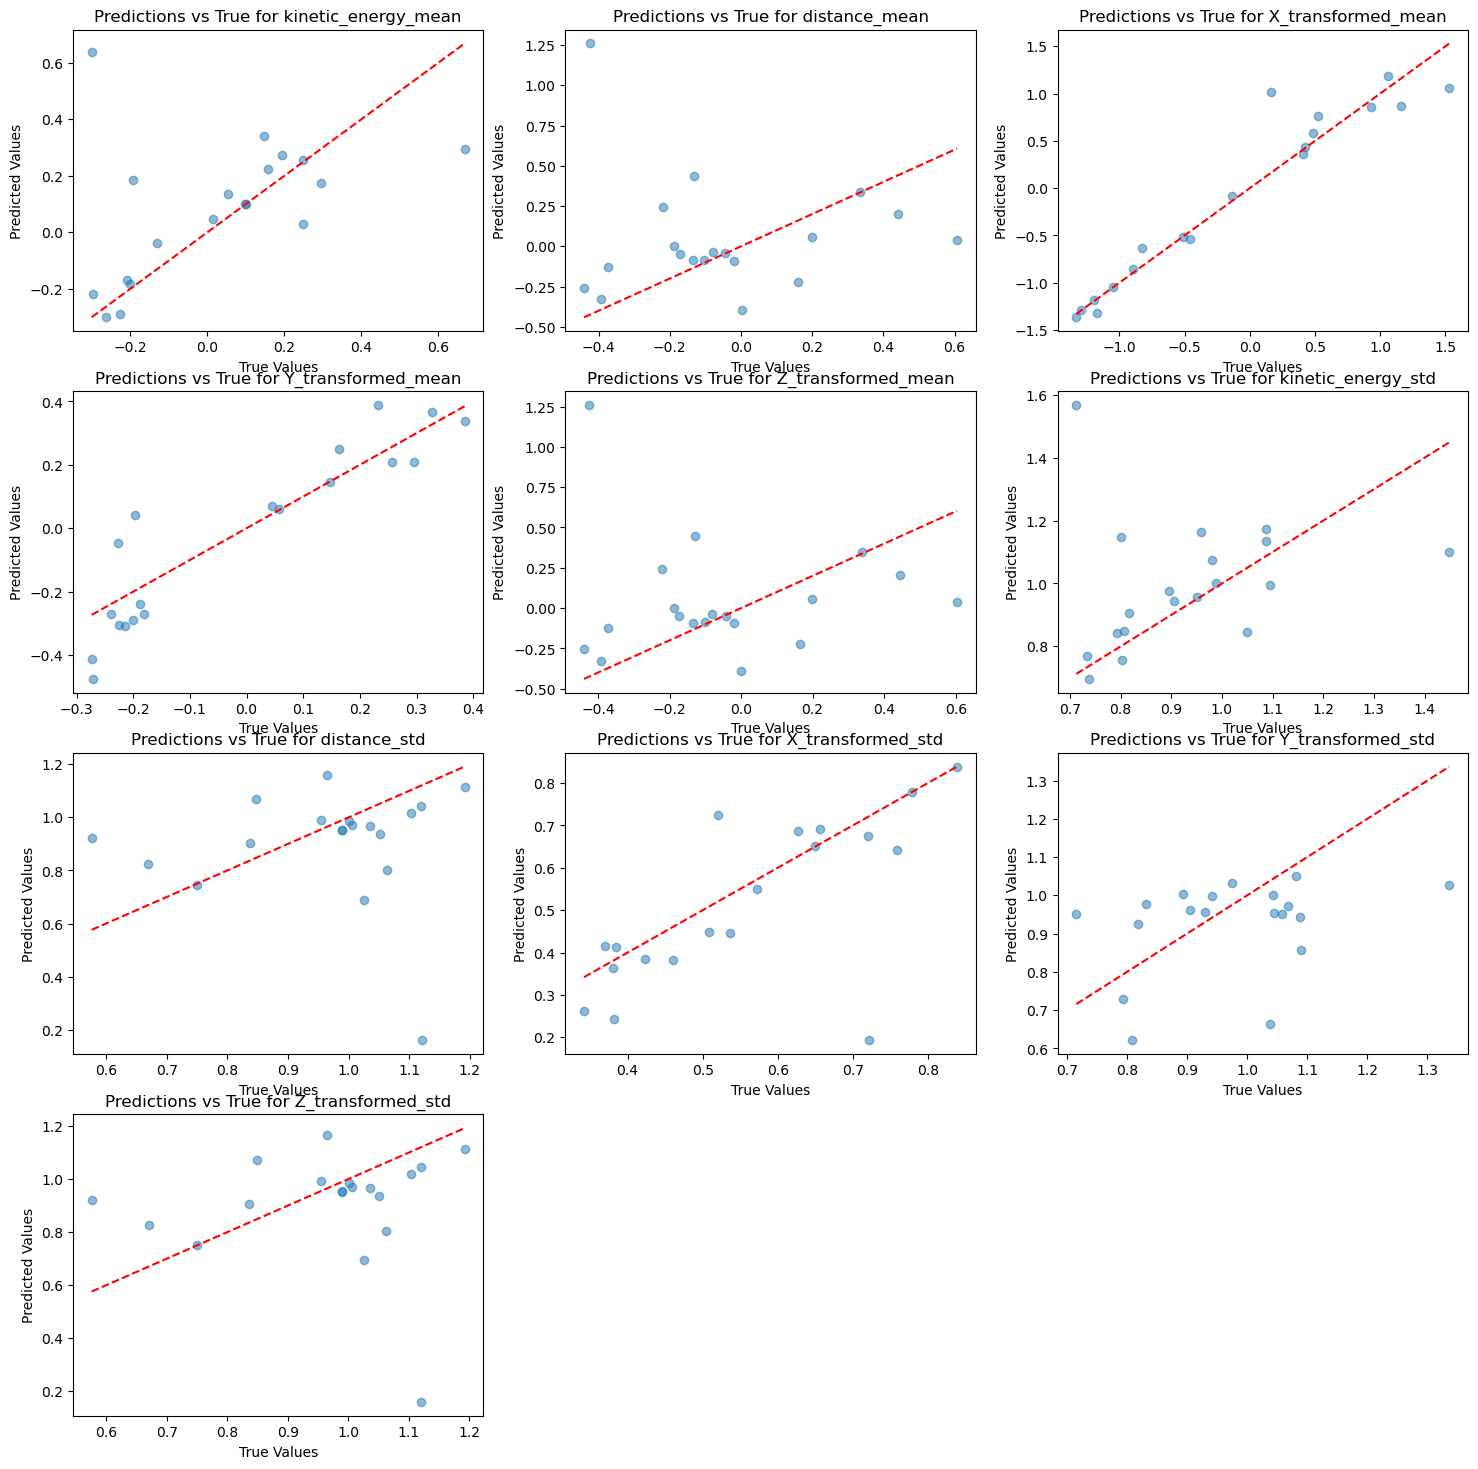

In [ ]:
# plot targets vs predictions for validation set
import numpy as np
val_outputs_np = val_outputs.detach().numpy()
val_targets_np = val_targets.detach().numpy()  
plt.figure(figsize=(18, 18))
# use 3 columns per row
for i, col in enumerate(output_columns):
    plt.subplot(len(output_columns)//3+1, 3, i+1)
    plt.scatter(val_targets_np[:, i], val_outputs_np[:, i], alpha=0.5)
    plt.plot([val_targets_np[:, i].min(), val_targets_np[:, i].max()],
             [val_targets_np[:, i].min(), val_targets_np[:, i].max()], 'r--')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Predictions vs True for {col}")
